In [1]:
import pandas as pd
import numpy as np
from googletrans import Translator

In [42]:
from sklearn.cluster import KMeans

In [2]:
translator=Translator()
chronic_diseases=pd.read_csv("municipality-chronicConditions.csv",sep=';',decimal=',')
cases=pd.read_csv("https://raw.githubusercontent.com/J535D165/CoronaWatchNL/master/data/rivm_NL_covid19_total_municipality.csv")
cases.rename(columns = lambda x : translator.translate(x).text, inplace =True)
cases_cpy=cases.copy()
cases_new=cases.loc[:, ['municipality Name','Number']]
cases.head()

,date,Municipal Code,municipality Name,Provincienaam,Provinciecode,Number
0,2020-02-27,-1,NaN,NaN,NaN,0
1,2020-02-27,3,Appingedam,Groningen,20.0,0
2,2020-02-27,10,Delfzijl,Groningen,20.0,0
3,2020-02-27,14,Groningen,Groningen,20.0,0
4,2020-02-27,24,Loppersum,Groningen,20.0,0


In [3]:
chronic_diseases.rename(columns = lambda x : translator.translate(x).text, inplace =True)
chronic_diseases.head()

,Municipalities,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients
0,Aa en Hunze,4.9,6.7,880,970,753,529,1027
1,Aalsmeer,4.0,5.0,1056,936,604,488,958
2,Aalten,5.6,6.0,1156,1053,682,692,939
3,Achtkarspelen,5.5,6.3,1642,1064,658,644,1181
4,Alblasserdam,4.9,6.2,1052,733,421,446,753


In [4]:
cases_municipality=cases_new.groupby('municipality Name').sum().reset_index()
cases_municipality.sort_values(by=['Number'])

,municipality Name,Number
259,Schiermonnikoog,0
308,Vlieland,0
14,Ameland,0
280,Terschelling,72
181,Loppersum,85
254,Rozendaal,137
19,Appingedam,165
271,Stadskanaal,195
236,Pekela,219
225,Ooststellingwerf,221


In [5]:
final_dataframe = pd.concat([chronic_diseases,cases_municipality], axis=1)
final_dataframe2=final_dataframe.copy()
final_dataframe2.head()

,Municipalities,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients,municipality Name,Number
0,Aa en Hunze,4.9,6.7,880,970,753,529,1027,'s-Gravenhage,40792
1,Aalsmeer,4.0,5.0,1056,936,604,488,958,'s-Hertogenbosch,16723
2,Aalten,5.6,6.0,1156,1053,682,692,939,Aa en Hunze,524
3,Achtkarspelen,5.5,6.3,1642,1064,658,644,1181,Aalsmeer,1533
4,Alblasserdam,4.9,6.2,1052,733,421,446,753,Aalten,1825


In [6]:
final_dataframe.info()
final_dataframe.to_csv("HealthwithcasesDataSet.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 10 columns):
Municipalities                                            355 non-null object
People with two or more chronic conditions                351 non-null float64
Use type II diabetes                                      351 non-null float64
Chronic disease - COPD and Asthma - Patients / Clients    355 non-null int64
Chronic disease - Heart failure - Patients / Clients      355 non-null int64
Chronic disease - Diabetes - Patients / Clients           355 non-null int64
Chronic disease - Rheumatism - Patients / Clients         355 non-null int64
Chronic disease - Cancer - Patients / Clients             355 non-null int64
municipality Name                                         355 non-null object
Number                                                    355 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 27.8+ KB


In [7]:
final_dataframe=final_dataframe.drop(['municipality Name', 'Municipalities'], axis=1)
final_dataframe2=final_dataframe2.drop(['municipality Name', 'Municipalities'], axis=1)
final_dataframe2.head()

,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients,Number
0,4.9,6.7,880,970,753,529,1027,40792
1,4.0,5.0,1056,936,604,488,958,16723
2,5.6,6.0,1156,1053,682,692,939,524
3,5.5,6.3,1642,1064,658,644,1181,1533
4,4.9,6.2,1052,733,421,446,753,1825


In [8]:
final_dataframe=final_dataframe.fillna(0)
final_dataframe2=final_dataframe2.fillna(0)
targets=final_dataframe['Number']
targets=np.array(targets)
targets

array([40792, 16723,   524,  1533,  1825,   357,  1482,  3280,  8426,
        3364, 11906,  6214,  1931,  4734,     0,  6990, 11085, 73132,
       12292,   165,  9415,  1530,  2561,   498,  1738,  4132,  4065,
        1594,  5422,   362,  1604,  6325,  1928,   748,  2187,  3854,
        2279, 10473,  2533,  2397,  2836,  2210,   961,  1859,  1715,
        3998,   288,  1966,   901,  3944,  2527, 19395,  1152,  2272,
        1273,  3186,  1242,  1954,  1558,  9226,  2901,  2293,  6374,
        2351,  2195,  2852,   249,  4963,  2266,  3153,  1543,  4739,
         646,  1329,  5730,  7840,  2769,  2950,  1045,  3289,  2741,
       10057,  1594,  2494,  3836,  3998,  1596,  3327,  2953,  7077,
         548,  2382,  5710, 17067,  4068,  3390,  1244,  7214,  4558,
        4050,  6307,  1520,  3746,  7174,  2063,  2803, 10108,  2631,
        2886,  3786,  5308,  8337,  2415,  6818,  2499,  1967,  1808,
       10076,  8305,  2087,  6157,  4402,  1268,   614,  1589,  3108,
        3646,  6344,

In [9]:
unscaled_inputs = final_dataframe.iloc[:,:-1]

In [10]:
#STANDARDIZATION
from sklearn.preprocessing import StandardScaler
disease_scaler= StandardScaler()

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [12]:
unscaled_inputs.columns.values

array(['People with two or more chronic conditions',
       'Use type II diabetes',
       'Chronic disease - COPD and Asthma - Patients / Clients',
       'Chronic disease - Heart failure - Patients / Clients',
       'Chronic disease - Diabetes - Patients / Clients',
       'Chronic disease - Rheumatism - Patients / Clients',
       'Chronic disease - Cancer - Patients / Clients'], dtype=object)

In [13]:
columns_to_omit=[]
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]
disease_scaler = CustomScaler(columns_to_scale)

In [14]:
disease_scaler.fit(unscaled_inputs)

C:\Users\20195478\python\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['People with two or more chronic conditions',
                      'Use type II diabetes',
                      'Chronic disease - COPD and Asthma - Patients / Clients',
                      'Chronic disease - Heart failure - Patients / Clients',
                      'Chronic disease - Diabetes - Patients / Clients',
                      'Chronic disease - Rheumatism - Patients / Clients',
                      'Chronic disease - Cancer - Patients / Clients'],
             copy=None, with_mean=None, with_std=None)

In [15]:
scaled_inputs = disease_scaler.transform(unscaled_inputs)
scaled_inputs.head()

,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients
0,-0.020139,0.918133,-0.413376,-0.334049,-0.227064,-0.348798,-0.257938
1,-0.926405,-0.535417,-0.354957,-0.348923,-0.350220,-0.385909,-0.284040
2,0.684734,0.319612,-0.321765,-0.297740,-0.285749,-0.201258,-0.291228
3,0.584038,0.576121,-0.160449,-0.292928,-0.305586,-0.244705,-0.199681
4,-0.020139,0.490618,-0.356285,-0.437726,-0.501478,-0.423926,-0.361591


In [16]:
from sklearn.model_selection import train_test_split
train_test_split(scaled_inputs, targets)

[     People with two or more chronic conditions  Use type II diabetes  \
 343                                    0.281949              0.661624   
 330                                    0.382646              0.747127   
 220                                    0.181253             -0.022399   
 22                                    -0.624317             -0.791926   
 36                                     0.382646             -0.535417   
 229                                    0.886127              1.003636   
 189                                    0.080557              0.661624   
 38                                     0.382646              0.490618   
 180                                    1.792393              1.345647   
 225                                   -1.127798             -0.107902   
 276                                    1.288912              0.661624   
 59                                     0.785431              1.431150   
 24                                   

In [17]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)
print (x_train.shape, y_train.shape)

(284, 7) (284,)


In [18]:
print(x_test.shape,y_test.shape)

(71, 7) (71,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_train,y_train)
#reg.intercept_

0.03367045183673523

In [21]:
reg.coef_

array([ -269.14792045,   141.26815268,  3046.76338536,  5457.95964656,
         -99.18171959, -6149.58966996, -1629.95650453])

In [22]:
featurename = unscaled_inputs.columns.values
summary_table = pd.DataFrame (columns=['Feature name'], data = featurename)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table

,Feature name,Coefficient
0,People with two or more chronic conditions,-269.147920
1,Use type II diabetes,141.268153
2,Chronic disease - COPD and Asthma - Patients /...,3046.763385
3,Chronic disease - Heart failure - Patients / C...,5457.959647
4,Chronic disease - Diabetes - Patients / Clients,-99.181720
5,Chronic disease - Rheumatism - Patients / Clients,-6149.589670
6,Chronic disease - Cancer - Patients / Clients,-1629.956505


# Backward Elimination using stats library

In [23]:
final_dataframe2.head()
X=final_dataframe2.drop(['Number','People with two or more chronic conditions','Use type II diabetes'],axis=1)
X.head(4)

,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients
0,880,970,753,529,1027
1,1056,936,604,488,958
2,1156,1053,682,692,939
3,1642,1064,658,644,1181


In [24]:
Y=final_dataframe.Number
Y.head(4)

0    40792
1    16723
2      524
3     1533
Name: Number, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train

,const,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients,Number
298,1.0,5.4,5.8,1334,1103,797,522,1083,5685
247,1.0,4.8,5.2,1580,1456,933,878,1278,4081
309,1.0,5.3,6.0,2008,1574,1011,1018,1606,1986
336,1.0,5.7,6.3,1284,1106,730,796,1076,1264
142,1.0,4.3,5.0,3924,2863,1507,1928,2743,1498
21,1.0,6.8,6.7,315,326,211,146,259,1530
339,1.0,4.6,5.7,596,460,324,374,528,1563
141,1.0,5.1,5.1,572,567,340,358,438,1126
49,1.0,4.9,5.7,8138,6721,3633,3040,5805,3944
310,1.0,6.2,6.7,524,437,403,275,504,1585


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:,'Chronic disease - COPD and Asthma - Patients / Clients':]= scaler.fit_transform(X_train.loc[:,'Chronic disease - COPD and Asthma - Patients / Clients':])
X_test.loc[:,'Chronic disease - COPD and Asthma - Patients / Clients':] = scaler.transform(X_test.loc[:,'Chronic disease - COPD and Asthma - Patients / Clients':])
X_train

C:\Users\20195478\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\20195478\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients
298,-0.285733,-0.291288,-0.202456,-0.381537,-0.254135
247,-0.194218,-0.128581,-0.079186,-0.033281,-0.172299
309,-0.034997,-0.074191,-0.008486,0.103673,-0.034645
336,-0.304334,-0.289905,-0.263185,-0.113497,-0.257073
142,0.677780,0.519943,0.441089,0.993878,0.442525
21,-0.664814,-0.649427,-0.733608,-0.749358,-0.599948
339,-0.560279,-0.587663,-0.631184,-0.526317,-0.487055
141,-0.569207,-0.538344,-0.616682,-0.541969,-0.524826
49,2.245442,2.298197,2.368098,2.081688,1.727571
310,-0.587064,-0.598265,-0.559578,-0.623164,-0.497127


In [27]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
Y_pred=regressor.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse=round((mean_squared_error(Y_test,Y_pred))/100, 2)
rmse = round((sqrt(mse))/100 ,2)
mse ,rmse

(232767.72, 4.82)

In [30]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

C:\Users\20195478\python\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Number   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.611
Date:                Mon, 18 May 2020   Prob (F-statistic):              0.156
Time:                        01:26:10   Log-Likelihood:                -3635.8
No. Observations:                 355   AIC:                             7284.
Df Residuals:                     349   BIC:                             7307.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   3860.2357    639.727      6.034      0.000    2602.030    5118.441
Chronic disease - COPD and Asthma - Patients / Clients     0.6530      0.744      0.877      0.381      -0.811       2.117
Chronic disease - Heart failure - Patients / Clients       1.8947      1.401      1.353      0.177      -0.860       4.649
Chronic disease - Diabetes - Patients / Clients            0.0051      1.902      0.003      0.998      -3.736       3.746
Chronic disease - Rheumatism - Patients / Clients         -3.4247      2.350     -1.457      0.146      -8.046       1.197
Chronic disease - Cancer - Patients / Clients             -0.6718      0.990     -0.679      0.498      -2.619       1.275
==============================================================================
Omnibus:                      491.020   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58364.973
Skew:                           6.845   Prob(JB):                         0.00
Kurtosis:                      64.306   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = X_train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

<Figure size 640x480 with 2 Axes>

# Backward Elimination two variables

In [32]:
final_dataframe2.head()
#X=final_dataframe2.drop(['Number','Chronic disease - COPD and Asthma - Patients / Clients','Chronic disease - Heart failure - Patients / Clients','Chronic disease - Diabetes - Patients / Clients','Chronic disease - Rheumatism - Patients / Clients','Chronic disease - Cancer - Patients / Clients'],axis=1)
X=final_dataframe2
X.head(4)

,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients,Number
0,4.9,6.7,880,970,753,529,1027,40792
1,4.0,5.0,1056,936,604,488,958,16723
2,5.6,6.0,1156,1053,682,692,939,524
3,5.5,6.3,1642,1064,658,644,1181,1533


In [33]:
Y=final_dataframe.Number
Y.head(4)

0    40792
1    16723
2      524
3     1533
Name: Number, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:,'People with two or more chronic conditions':]= scaler.fit_transform(X_train.loc[:,'People with two or more chronic conditions':])
X_test.loc[:,'People with two or more chronic conditions':] = scaler.transform(X_test.loc[:,'People with two or more chronic conditions':])
X_train

C:\Users\20195478\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\20195478\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients,Number
298,0.457142,0.128460,-0.285733,-0.291288,-0.202456,-0.381537,-0.254135,0.199951
247,-0.140228,-0.380602,-0.194218,-0.128581,-0.079186,-0.033281,-0.172299,-0.018908
309,0.357581,0.298148,-0.034997,-0.074191,-0.008486,0.103673,-0.034645,-0.304763
336,0.755827,0.552679,-0.304334,-0.289905,-0.263185,-0.113497,-0.257073,-0.403277
142,-0.638036,-0.550289,0.677780,0.519943,0.441089,0.993878,0.442525,-0.371349
21,1.851006,0.892054,-0.664814,-0.649427,-0.733608,-0.749358,-0.599948,-0.366983
339,-0.339351,0.043617,-0.560279,-0.587663,-0.631184,-0.526317,-0.487055,-0.362480
141,0.158457,-0.465445,-0.569207,-0.538344,-0.616682,-0.541969,-0.524826,-0.422107
49,-0.040666,0.043617,2.245442,2.298197,2.368098,2.081688,1.727571,-0.037602
310,1.253636,0.892054,-0.587064,-0.598265,-0.559578,-0.623164,-0.497127,-0.359478


In [36]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
Y_pred=regressor.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse=round((mean_squared_error(Y_test,Y_pred))/100, 2)
rmse = round((sqrt(mse))/100 ,2)
mse ,rmse

(0.0, 0.0)

In [39]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

C:\Users\20195478\python\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Number   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.664e+31
Date:                Mon, 18 May 2020   Prob (F-statistic):               0.00
Time:                        01:26:13   Log-Likelihood:                 8591.9
No. Observations:                 355   AIC:                        -1.717e+04
Df Residuals:                     346   BIC:                        -1.713e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   3.865e-12   2.26e-12      1.709      0.088   -5.84e-13    8.31e-12
People with two or more chronic conditions             -6.537e-13    8.6e-13     -0.760      0.448   -2.35e-12    1.04e-12
Use type II diabetes                                   -9.095e-13   7.34e-13     -1.239      0.216   -2.35e-12    5.34e-13
Chronic disease - COPD and Asthma - Patients / Clients  1.776e-15   8.66e-16      2.052      0.041    7.38e-17    3.48e-15
Chronic disease - Heart failure - Patients / Clients   -8.882e-16   1.56e-15     -0.570      0.569   -3.95e-15    2.18e-15
Chronic disease - Diabetes - Patients / Clients        -2.442e-15   2.22e-15     -1.099      0.273   -6.81e-15    1.93e-15
Chronic disease - Rheumatism - Patients / Clients      -3.331e-15   2.64e-15     -1.260      0.209   -8.53e-15    1.87e-15
Chronic disease - Cancer - Patients / Clients           4.441e-16   1.12e-15      0.397      0.691   -1.76e-15    2.64e-15
Number                                                     1.0000   5.92e-17   1.69e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      400.439   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25697.799
Skew:                          -4.939   Prob(JB):                         0.00
Kurtosis:                      43.494   Cond. No.                     4.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

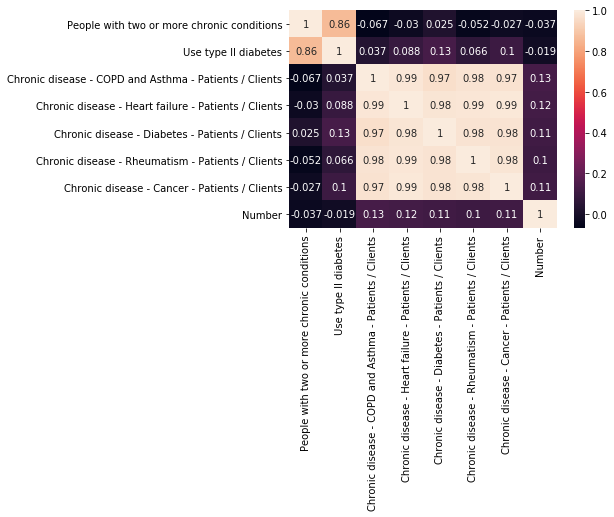

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = X_train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [58]:
from pandas import Series, DataFrame
km = KMeans(n_clusters=6, random_state=1)
km.fit(X_train)
predict=km.predict(X_train)
X_train['NEW_COLUMN'] = Series(predict, index=X_train.index)

C:\Users\20195478\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [57]:
X_train

,const,People with two or more chronic conditions,Use type II diabetes,Chronic disease - COPD and Asthma - Patients / Clients,Chronic disease - Heart failure - Patients / Clients,Chronic disease - Diabetes - Patients / Clients,Chronic disease - Rheumatism - Patients / Clients,Chronic disease - Cancer - Patients / Clients,Number,NEW_COLUMN
298,1.0,5.4,5.8,1334,1103,797,522,1083,5685,0
247,1.0,4.8,5.2,1580,1456,933,878,1278,4081,0
309,1.0,5.3,6.0,2008,1574,1011,1018,1606,1986,0
336,1.0,5.7,6.3,1284,1106,730,796,1076,1264,0
142,1.0,4.3,5.0,3924,2863,1507,1928,2743,1498,0
21,1.0,6.8,6.7,315,326,211,146,259,1530,0
339,1.0,4.6,5.7,596,460,324,374,528,1563,0
141,1.0,5.1,5.1,572,567,340,358,438,1126,0
49,1.0,4.9,5.7,8138,6721,3633,3040,5805,3944,0
310,1.0,6.2,6.7,524,437,403,275,504,1585,0
